In [1]:
import pandas as pd
import datetime as dt
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


data = pd.read_csv("../raw_data/AAPL.csv", parse_dates = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.629209,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.697079,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.838044,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.972249,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.951672,394024400


In [2]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=data.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

      signal  short_mavg   long_mavg  positions
0        0.0   14.686786   14.686786        NaN
1        0.0   14.726250   14.726250        0.0
2        0.0   14.794048   14.794048        0.0
3        0.0   14.866964   14.866964        0.0
4        0.0   14.905929   14.905929        0.0
...      ...         ...         ...        ...
2369     1.0  129.340500  128.564800        0.0
2370     1.0  129.228750  128.533900        0.0
2371     1.0  129.051250  128.504900        0.0
2372     1.0  128.938750  128.463400        0.0
2373     1.0  128.756250  128.445600        0.0

[2374 rows x 4 columns]


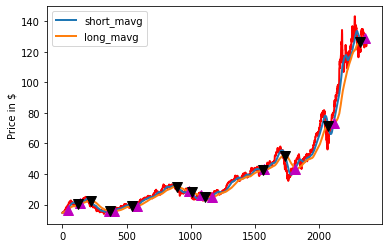

In [3]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
data['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

### The strategy that you’ll be developing is simple: you create two separate Simple Moving Averages (SMA) of a time series with differing lookback periods, let’s say, 40 days and 100 days. If the short moving average exceeds the long moving average then you go long, if the long moving average exceeds the short moving average then you exit. 

### Remember that when you go long, you think that the stock price will go up and will sell at a higher price in the future (= buy signal); When you go short, you sell your stock, expecting that you can buy it back at a lower price and realize a profit (= sell signal).

### Lorsque la moyenne courte vient couper la moyenne longue en passant au-dessus de cette moyenne longue, alors la valeur entame un cycle de hausse, modifiant sa tendance courte.